In [1]:
import os
import shutil

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pretty_midi
import IPython.display as ipd
import libfmp.c1

from utils.data import *

In [2]:
midi_note_df = pd.read_csv('./data/midi_to_notes.csv', index_col=0)
midi_note_df

C  C#/Db    D  D#/Eb    E    F  F#/Gb    G  G#/Ab    A  A#/Bb    B
Octave                                                                      
-2        0      1    2      3    4    5      6    7      8    9     10   11
-1       12     13   14     15   16   17     18   19     20   21     22   23
 0       24     25   26     27   28   29     30   31     32   33     34   35
 1       36     37   38     39   40   41     42   43     44   45     46   47
 2       48     49   50     51   52   53     54   55     56   57     58   59
 3       60     61   62     63   64   65     66   67     68   69     70   71
 4       72     73   74     75   76   77     78   79     80   81     82   83
 5       84     85   86     87   88   89     90   91     92   93     94   95
 6       96     97   98     99  100  101    102  103    104  104    106  107
 7      108    109  110    111  112  113    114  115    116  117    118  119
 8      120    121  122    123  124  125    126  127    128  129    130  131

In [3]:
path = './data/midi_samples/rolling-in-the-deep/chorus_symbol_key.mid'
midi_data = pretty_midi.PrettyMIDI(path)
df = midi_to_df(midi_data)

In [4]:
for key in midi_data.key_signature_changes:
    print(key.key_number, key.time)

0 0.0


In [5]:
df

Start        End  Pitch  Velocity Instrument
0    0.865385   1.153846     55        80     melody
1    1.153846   1.442307     58        80     melody
2    1.442307   1.730769     55        80     melody
3    1.730769   2.019230     58        80     melody
4    2.019230   2.307692     55        80     melody
5    2.307692   4.038461     60        80     melody
6    4.038461   4.326923     60        80     melody
7    4.326923   5.192307     58        80     melody
8    5.769230   6.057691     58        80     melody
9    6.057691   6.346153     55        80     melody
10   6.346153   6.634614     58        80     melody
11   6.634614   6.923076     55        80     melody
12   6.923076   8.653845     60        80     melody
13   8.653845   8.942306     62        80     melody
14   8.942306   9.807691     58        80     melody
15  10.096153  10.384614     55        80     melody
16  10.384614  10.673075     58        80     melody
17  10.673075  10.961537     55        80     melody
18  10.961537  11.249999     58        80     melody
19  11.249999  11.538460     55        80     melody
20  11.538460  12.980767     60        80     melody
21  12.980767  13.269229     60        80     melody
22  13.269229  13.557690     62        80     melody
23  13.557690  14.423075     58        80     melody
24  15.288460  15.576921     55        80     melody
25  15.576921  15.865382     55        80     melody
26  15.865382  16.442305     56        80     melody
27  16.442305  16.730767     56        80     melody
28  17.596152  17.884613     55        80     melody
29  17.884613  18.173074     55        80     melody
30  18.173074  18.461536     56        80     melody
31  18.461536  18.749997     55        80     melody
32  18.749997  19.038459     53        80     melody
33  19.038459  20.192305     51        80     melody

In [6]:
print(f'Key of song: {pretty_midi.key_number_to_key_name(midi_data.key_signature_changes[0].key_number)}')
print(f'Time signature: {midi_data.time_signature_changes[0].numerator}/{midi_data.time_signature_changes[0].denominator}')
print(f'Event time in seconds of each beat: \n {midi_data.get_beats()}')
print(f'Beat start in seconds: {midi_data.estimate_beat_start()}')
print(f'Beat start / beat duration: {midi_data.estimate_beat_start() / midi_data.get_beats()[1]}')
print(f'Beats per minute based on pretty_midi.estimate_tempo: {midi_data.estimate_tempo()}')
print(f'Beats per minute based on 60s/beat duration: {60 / midi_data.get_beats()[1]}')

Key of song: C Major
Time signature: 4/4
Event time in seconds of each beat: 
 [ 0.        0.576923  1.153846  1.730769  2.307692  2.884615  3.461538
  4.038461  4.615384  5.192307  5.76923   6.346153  6.923076  7.499999
  8.076922  8.653845  9.230768  9.807691 10.384614 10.961537 11.53846
 12.115383 12.692306 13.269229 13.846152 14.423075 14.999998 15.576921
 16.153844 16.730767 17.30769  17.884613 18.461536 19.038459 19.615382]
Beat start in seconds: 6.0576915
Beat start / beat duration: 10.5
Beats per minute based on pretty_midi.estimate_tempo: 143.00001906666918
Beats per minute based on 60s/beat duration: 104.00001386666852


In [7]:
df.loc[:, ['Start', 'End']] /= midi_data.get_beats()[1]
df.loc[:, ['Start', 'End']] *= 0.5
df

Start    End  Pitch  Velocity Instrument
0    0.75   1.00     55        80     melody
1    1.00   1.25     58        80     melody
2    1.25   1.50     55        80     melody
3    1.50   1.75     58        80     melody
4    1.75   2.00     55        80     melody
5    2.00   3.50     60        80     melody
6    3.50   3.75     60        80     melody
7    3.75   4.50     58        80     melody
8    5.00   5.25     58        80     melody
9    5.25   5.50     55        80     melody
10   5.50   5.75     58        80     melody
11   5.75   6.00     55        80     melody
12   6.00   7.50     60        80     melody
13   7.50   7.75     62        80     melody
14   7.75   8.50     58        80     melody
15   8.75   9.00     55        80     melody
16   9.00   9.25     58        80     melody
17   9.25   9.50     55        80     melody
18   9.50   9.75     58        80     melody
19   9.75  10.00     55        80     melody
20  10.00  11.25     60        80     melody
21  11.25  11.50     60        80     melody
22  11.50  11.75     62        80     melody
23  11.75  12.50     58        80     melody
24  13.25  13.50     55        80     melody
25  13.50  13.75     55        80     melody
26  13.75  14.25     56        80     melody
27  14.25  14.50     56        80     melody
28  15.25  15.50     55        80     melody
29  15.50  15.75     55        80     melody
30  15.75  16.00     56        80     melody
31  16.00  16.25     55        80     melody
32  16.25  16.50     53        80     melody
33  16.50  17.50     51        80     melody

In [8]:
fs = 44100
audio_data = df_to_midi(df).fluidsynth(fs=fs, sf2_path='./data/soundfonts/Steinway_Grand_Piano_1.2.sf2')
ipd.Audio(audio_data, rate=fs)

In [9]:
df = add_octave_and_note(df, midi_note_df)

In [10]:
midi_data2 = df_to_midi(df)

In [11]:
midi_data2.instruments

[Instrument(program=0, is_drum=False, name="")]

In [12]:
df2 = midi_to_df(midi_data2)
df2

Start    End  Pitch  Velocity Instrument
0    0.75   1.00     55        80           
1    1.00   1.25     58        80           
2    1.25   1.50     55        80           
3    1.50   1.75     58        80           
4    1.75   2.00     55        80           
5    2.00   3.50     60        80           
6    3.50   3.75     60        80           
7    3.75   4.50     58        80           
8    5.00   5.25     58        80           
9    5.25   5.50     55        80           
10   5.50   5.75     58        80           
11   5.75   6.00     55        80           
12   6.00   7.50     60        80           
13   7.50   7.75     62        80           
14   7.75   8.50     58        80           
15   8.75   9.00     55        80           
16   9.00   9.25     58        80           
17   9.25   9.50     55        80           
18   9.50   9.75     58        80           
19   9.75  10.00     55        80           
20  10.00  11.25     60        80           
21  11.25  11.50     60        80           
22  11.50  11.75     62        80           
23  11.75  12.50     58        80           
24  13.25  13.50     55        80           
25  13.50  13.75     55        80           
26  13.75  14.25     56        80           
27  14.25  14.50     56        80           
28  15.25  15.50     55        80           
29  15.50  15.75     55        80           
30  15.75  16.00     56        80           
31  16.00  16.25     55        80           
32  16.25  16.50     53        80           
33  16.50  17.50     51        80

# Play audio

In [13]:
fs = 44100
audio_data = midi_data.fluidsynth(fs=fs, sf2_path='./data/soundfonts/Steinway_Grand_Piano_1.2.sf2')
ipd.Audio(audio_data, rate=fs)

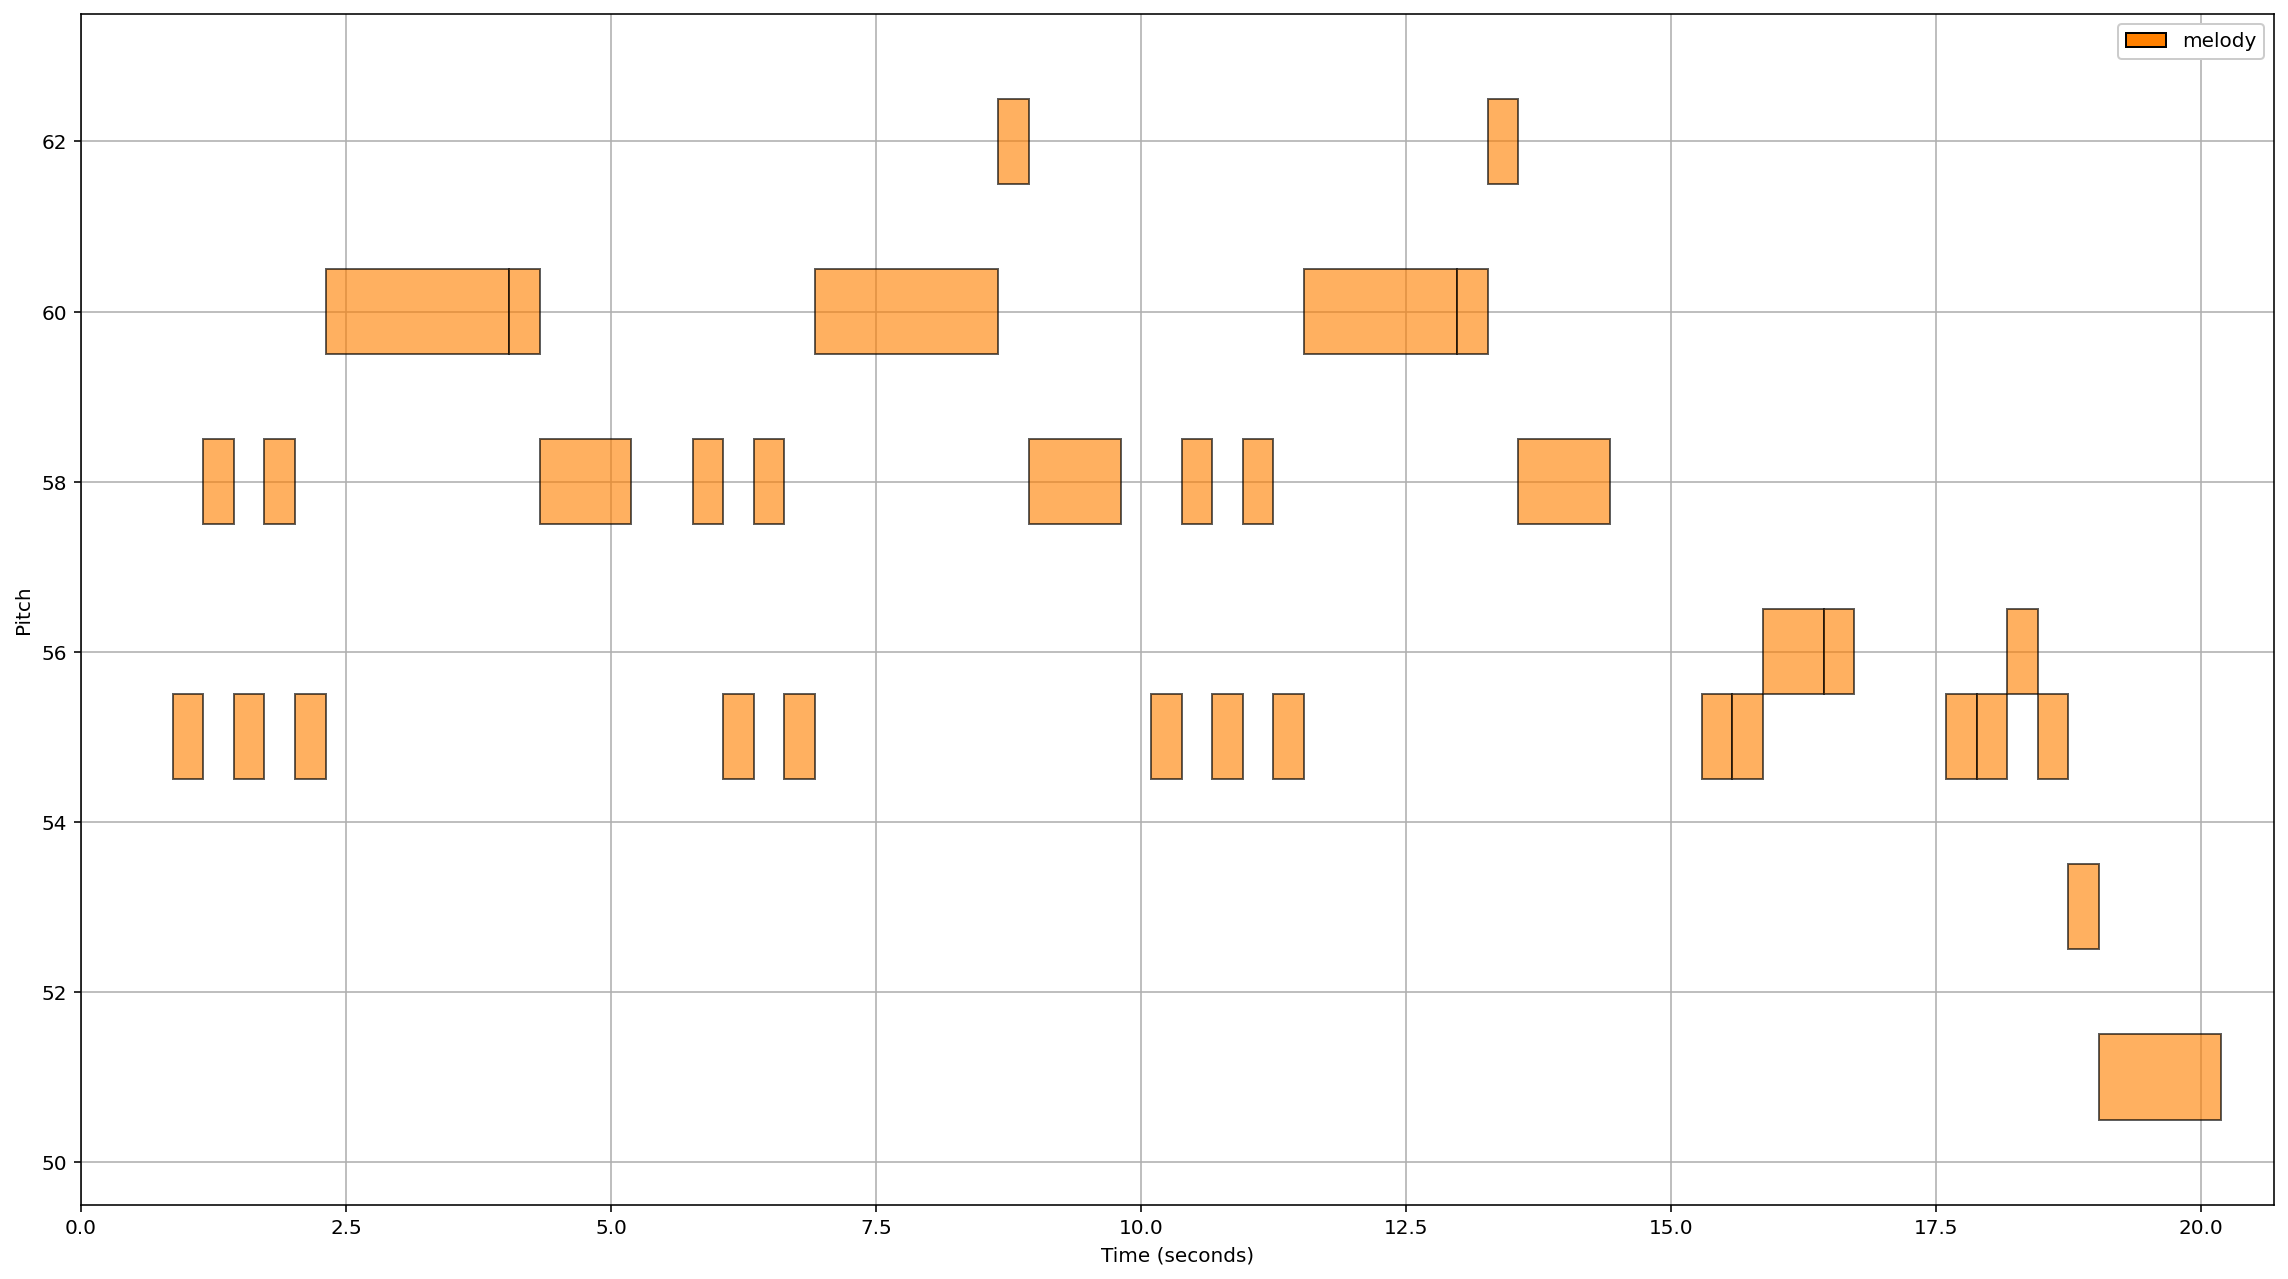

In [15]:
score = midi_to_list(midi_data)
libfmp.c1.visualize_piano_roll(score, figsize=(16, 9), velocity_alpha=True);

# Check keys of different midi files

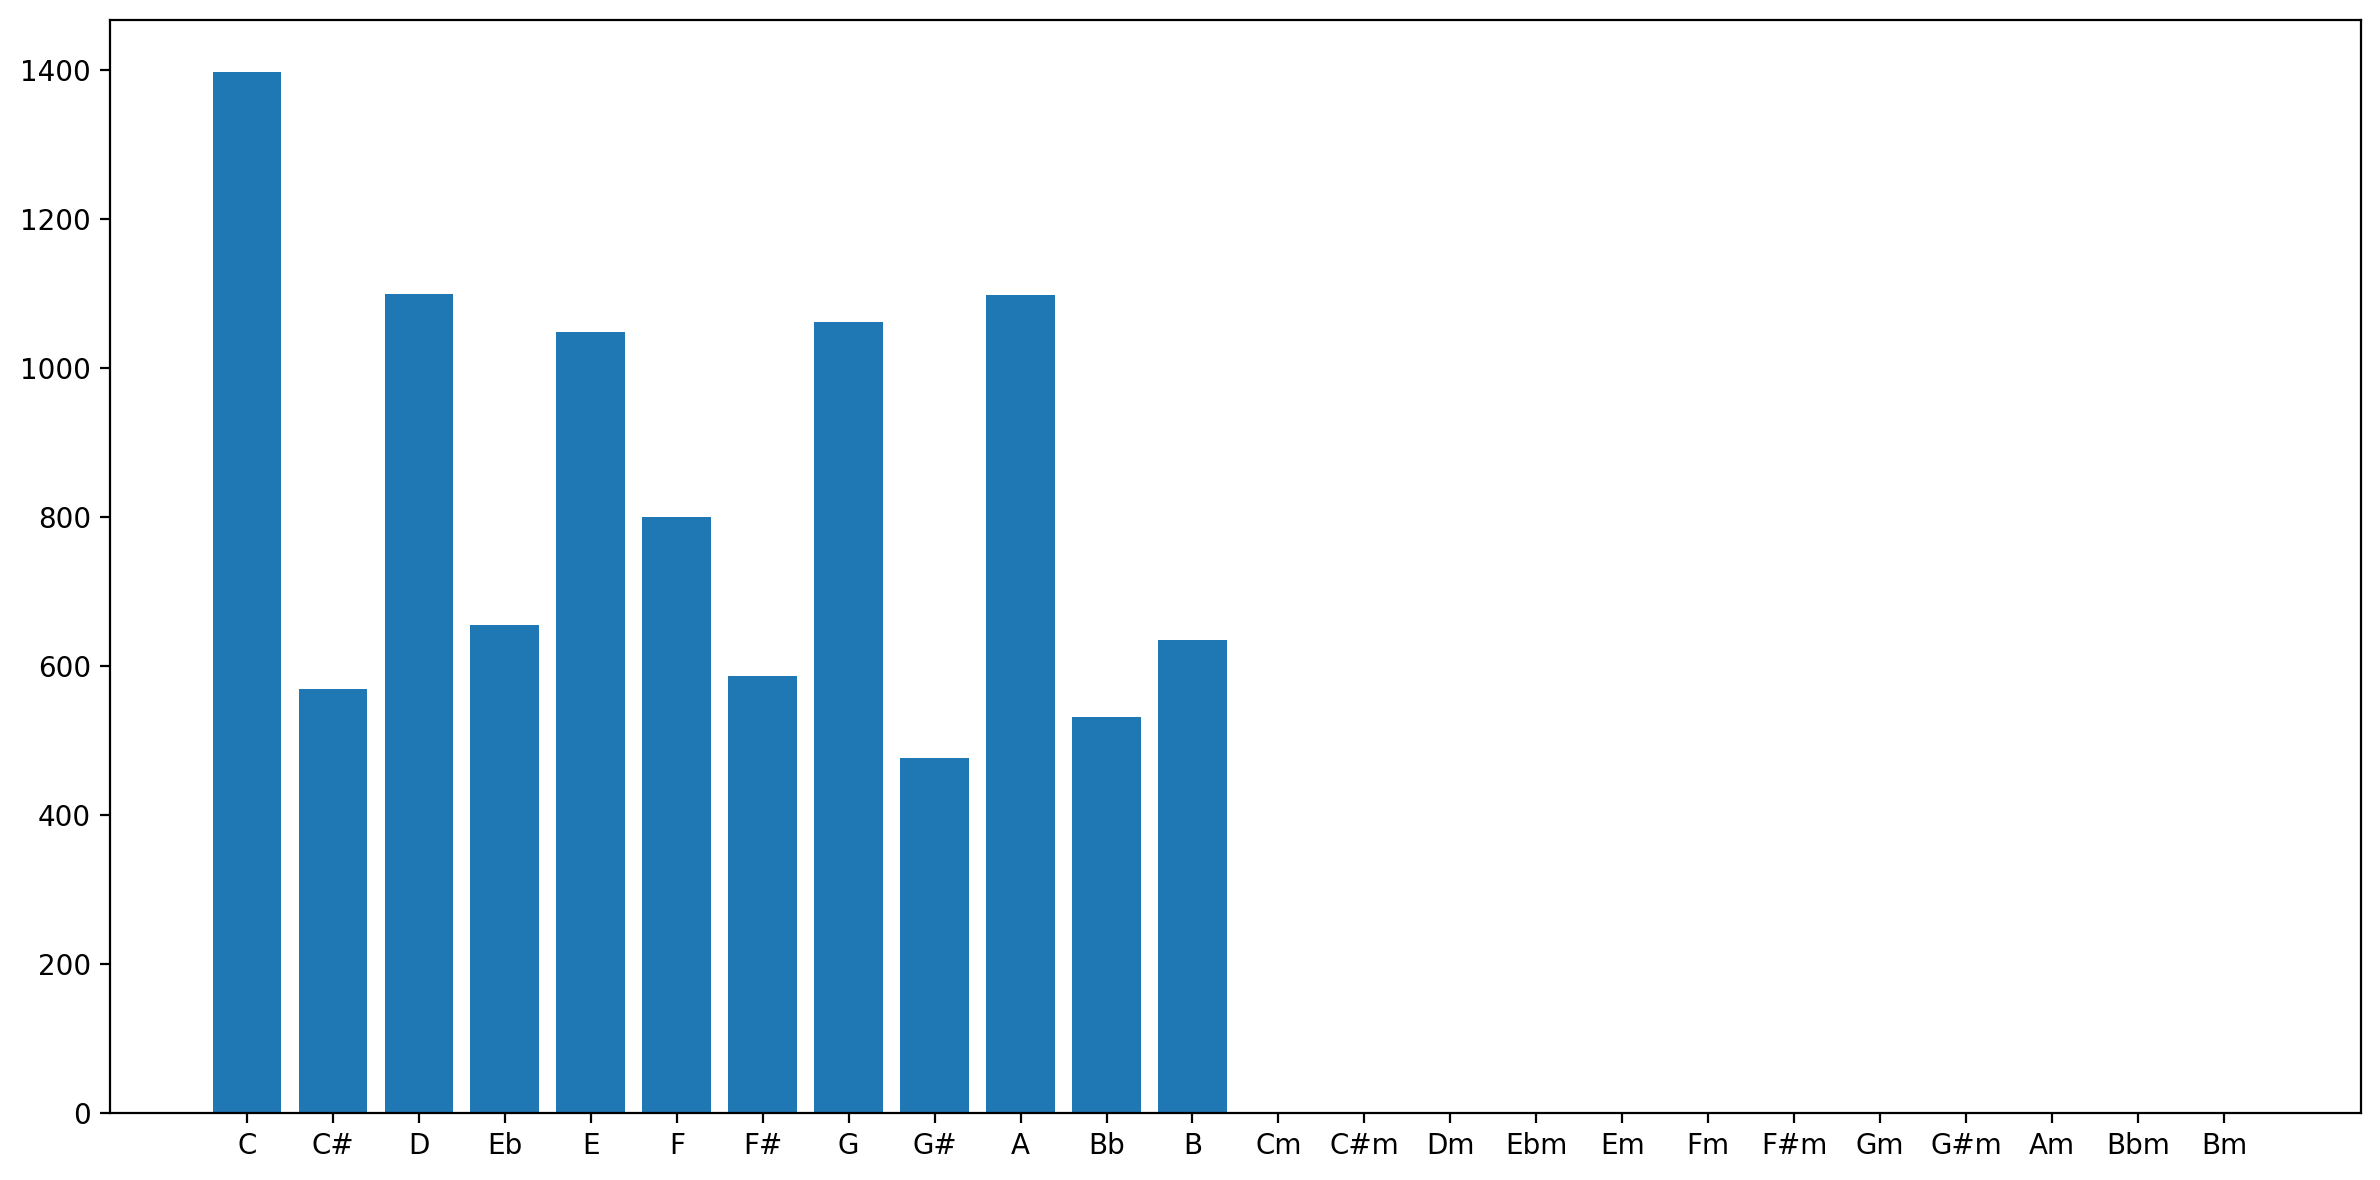

In [16]:
key_counts = np.zeros(24, dtype=int)
get_key_and_sort_files_to_dir('./data/theorytab/MIDI/', key_counts)
fig = plt.figure(figsize=(12, 6))
plt.bar(x=[get_key_note(i, tight=True) for i in range(24)], height=key_counts)
plt.tight_layout()

# Change all single key songs to key of C Major

In [ ]:
remove_empty('./data/single_key/')

In [17]:
def change_key(directory: str, n_midi_files: int=0):
    if n_midi_files > 0: # multiple midi files for same song
        pitches = []
        notes = []
        for entry in os.scandir(directory):
            if entry.is_file() and entry.name.endswith('.mid'):
                midi_data = pretty_midi.PrettyMIDI(entry.path)
                # key_signature = midi_data.key_signature_changes
                df = midi_to_df(midi_data)
                unique_pitches = np.unique(df['Pitch'].values)
                pitches += list(unique_pitches)
                notes += [pretty_midi.note_number_to_name(p) for p in unique_pitches]
        pitches = set(pitches)
        notes = set(notes)
        print(f'{directory}: {notes}')
    else:
        for entry in os.scandir(directory):
            if entry.is_dir():
                n_midi_files = len([name for name in os.listdir(entry.path) if name.endswith('.mid')])
                change_key(entry.path, n_midi_files)

In [18]:
change_key('./data/single_key/4/')

./data/single_key/4/i/imagine-dragons/warriors: {'D#4', 'E3', 'F#4', 'G4', 'A4', 'D#3', 'F#3', 'B3', 'B4', 'A3', 'G3', 'E4'}
./data/single_key/4/i/inverted-silence/fusion: set()
./data/single_key/4/i/iggy-azalea/team: {'F#4', 'E4', 'G4', 'B4', 'A4'}
./data/single_key/4/i/imposs-ft-j-perry/youre-on-my-mind: {'G#4', 'F#4', 'C#4', 'A4', 'B3', 'B4', 'E4'}
./data/single_key/4/i/iamamiwhoami/fountain: set()
./data/single_key/4/i/iron-maiden/blood-brothers: {'F#4', 'G5', 'E4', 'G4', 'E5', 'D5', 'C5', 'B4', 'F#5', 'A4'}
./data/single_key/4/i/iron-maiden/the-wicker-man: {'D4', 'F#4', 'G4', 'A4', 'B4', 'E4'}
./data/single_key/4/i/interpol/narc: {'D4', 'F#4', 'E4', 'B3', 'B4', 'A4'}
./data/single_key/4/i/ides-of-march/vehicle: {'G5', 'G4', 'E5', 'D5', 'A4', 'B4', 'F#5', 'E4'}
./data/single_key/4/i/infected-mushroom/fields-of-grey---au5-remix: {'D4', 'F#4', 'G4', 'A#3', 'B3', 'A3', 'E4'}
./data/single_key/4/i/infected-mushroom/heavyweight: {'C4', 'A#4', 'F#4', 'G5', 'C5', 'F5', 'E6', 'F#5', 'A4', 